In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
data1 = pd.read_csv('Penjualan Alat Pemadam Kebakaran 2020.csv')
data1.head(3)

,No.,NPWP,CUSTOMER,FAKTUR,PRODUK,BULAN,TAHUN,QTY,HARGA JUAL,NILAI,PPN,BANK
0,1,86.829.332.5-121.000,PT. SELAMAT AMAN SEJAHTERA,010.004-20.09287346,Peluit,1,2020,30,2000,60000,6000,66000
1,1,86.829.332.5-121.000,PT. SELAMAT AMAN SEJAHTERA,010.004-20.09287346,Pompa 25 HP Honda GX 690,1,2020,1,50000000,50000000,5000000,55000000
2,1,86.829.332.5-121.000,PT. SELAMAT AMAN SEJAHTERA,010.004-20.09287346,"Selang Spiral 4"" x 5 M",1,2020,1,400000,400000,40000,440000


In [ ]:
print(len(data1.index))
print(data1.isnull().sum())

3229
No.           0
NPWP          0
CUSTOMER      0
FAKTUR        0
PRODUK        0
BULAN         0
TAHUN         0
QTY           0
HARGA JUAL    0
NILAI         0
PPN           0
BANK          0
dtype: int64


In [ ]:
data2 = pd.read_csv('Penjualan Alat Pemadam Kebakaran 2021.csv')
data2.head(3)

,No.,NPWP,CUSTOMER,FAKTUR,PRODUK,BULAN,TAHUN,QTY,HARGA JUAL,NILAI,PPN,BANK
0,1,01.860.322.5-731.000,CV. SARANA PRIMA LESTARI,010.004-21.33715640,Rompi Hijau Reflektif Uk.L,1,2021,35,95000,3325000,332500,3657500
1,2,66.857.579.8-216.000,PT. GEMAH DINAMIKA PERKASA,010.004-21.33715641,Floating Pump Niagara 2 Plus,1,2021,1,36550000,36550000,3655000,40205000
2,2,66.857.579.8-216.000,PT. GEMAH DINAMIKA PERKASA,010.004-21.33715641,"Selang Rubber - 2.5""x30 M - OSW Syntex Unidur",1,2021,1,3400000,3400000,340000,3740000


In [ ]:
data2.isnull().sum()

No.              0
NPWP          5602
CUSTOMER      5601
FAKTUR        5601
PRODUK        5601
BULAN            0
TAHUN            0
QTY              0
HARGA JUAL       0
NILAI            0
PPN              0
BANK             0
dtype: int64

In [ ]:
data2drop=data2.dropna()
print(len(data2drop.index))
print(data2drop.isnull().sum())

3359
No.           0
NPWP          0
CUSTOMER      0
FAKTUR        0
PRODUK        0
BULAN         0
TAHUN         0
QTY           0
HARGA JUAL    0
NILAI         0
PPN           0
BANK          0
dtype: int64


In [ ]:
gabung = [data1, data2drop]
hasil = pd.concat(gabung)
hasil.to_csv('2020-2021.csv', index = False)

In [ ]:
hasilgab = hasil[['PRODUK','BULAN','TAHUN','QTY']]
hasilgab.head(5)

,PRODUK,BULAN,TAHUN,QTY
0,Peluit,1,2020,30
1,Pompa 25 HP Honda GX 690,1,2020,1
2,"Selang Spiral 4"" x 5 M",1,2020,1
3,Veples Standard TNI - Tanpa Mangkok,1,2020,150
4,"Selang Rubber - 2.5""x30 M - Jet Star",1,2020,8


In [ ]:
hasilgab['PRODUK'] = hasilgab['PRODUK'].str.lower()

In [ ]:
hasilgab.sort_values(by=['PRODUK'], inplace=True, ignore_index=True,ascending=True,key=lambda col: col.str.lower())
hasilgab.head(5)

,PRODUK,BULAN,TAHUN,QTY
0,achorage line,7,2020,1
1,"adaptor coupling storz 1.5"" - machino (f) 1.5""",5,2020,5
2,"adaptor coupling storz 1.5"" - machino (m) 1.5""",11,2020,1
3,"adaptor coupling storz 1.5"" - machino (m) 1.5""",10,2020,1
4,"adaptor coupling storz 1.5"" - machino (m) 1.5""",5,2020,2


In [ ]:
sum_bln = hasilgab.groupby(['BULAN','TAHUN','PRODUK'],as_index=False).agg({'QTY': 'sum'})
sum_bln.head(5)

,BULAN,TAHUN,PRODUK,QTY
0,1,2020,ap safety s4,26
1,1,2020,apron pupuk sponge dop kuning,592
2,1,2020,apron semprot sponge dop orange,42
3,1,2020,apron semprot taslan,165
4,1,2020,baju pemadam kebakaran,4


In [ ]:
sum_bln2 = sum_bln[['PRODUK','BULAN','TAHUN','QTY']]
sum_bln2

,PRODUK,BULAN,TAHUN,QTY
0,ap safety s4,1,2020,26
1,apron pupuk sponge dop kuning,1,2020,592
2,apron semprot sponge dop orange,1,2020,42
3,apron semprot taslan,1,2020,165
4,baju pemadam kebakaran,1,2020,4
...,...,...,...,...
2432,"tenda regu 6x4x2,5 m bahan d600",12,2021,9
2433,veples standard tni - tanpa mangkok,12,2021,50
2434,wearpack baju + celana,12,2021,21
2435,wearpack drill biru (l),12,2021,5


In [ ]:
sum_bln2.sort_values(by=['PRODUK'], inplace=True, ignore_index=True,ascending=True,key=lambda col: col.str.lower())
sum_bln2.head(5)

,PRODUK,BULAN,TAHUN,QTY
0,achorage line,7,2020,1
1,"adaptor coupling storz 1.5"" - machino (f) 1.5""",5,2020,5
2,"adaptor coupling storz 1.5"" - machino (m) 1.5""",10,2020,1
3,"adaptor coupling storz 1.5"" - machino (m) 1.5""",5,2020,11
4,"adaptor coupling storz 1.5"" - machino (m) 1.5""",11,2020,1


In [ ]:
sum_bln2.to_csv('jumlah tiap bulan.csv', index = False)

In [ ]:
sum_bln2['PRODUK'].nunique()

448

In [ ]:
sum_bln2['PRODUK'].unique()

array(['achorage line', 'adaptor coupling storz 1.5" - machino (f) 1.5"',
       'adaptor coupling storz 1.5" - machino (m) 1.5"',
       'adaptor coupling storz 2" - machino (f) 2"',
       'adaptor coupling storz 2" - machino (m) 2"',
       'adaptor machino 1,5" - storz 1,5"', 'alarm pemadam',
       'alpina hijau 9506', 'alpina tera eco 3 hijau', 'antena ht nh 31',
       'antena tarik panjang', 'ap boot orca', 'ap safety s4',
       'ap safety s5 no. 39', 'ap safety s5 no. 40',
       'ap safety s5 no. 41', 'ap safety s5 no. 42',
       'ap safety s5 no. 43', 'apar co 5kg', 'apar co2 4.5kg',
       'apar co2 6kg', 'apar co2 9 kg', 'apar co2 9kg',
       'apar kendaraan mobil', 'apar tabung 12kg', 'apar tabung 2kg',
       'apar tabung 3kg', 'apar tabung 4,5kg', 'apar tabung 5kg',
       'apar tabung 6kg', 'apar tabung 9kg', 'apron las biru gosave',
       'apron parasut kuning', 'apron pupuk hitam tali velcro',
       'apron pupuk sponge dop kuning', 'apron semprot sponge dop biru

In [ ]:
lengkap24 = sum_bln2.groupby('PRODUK').filter(lambda x : len(x)>23)
lengkap24.sort_values(['PRODUK','TAHUN','BULAN'],ascending=[True,True,True],inplace=True,ignore_index=True)
lengkap24.to_csv('lengkap24.csv', index = False)
lengkap24.head(100)

,PRODUK,BULAN,TAHUN,QTY
0,apron pupuk sponge dop kuning,1,2020,592
1,apron pupuk sponge dop kuning,2,2020,572
2,apron pupuk sponge dop kuning,3,2020,312
3,apron pupuk sponge dop kuning,4,2020,161
4,apron pupuk sponge dop kuning,5,2020,347
...,...,...,...,...
95,garu cangkul,12,2021,53
96,"jet nozzle - kuningan - 2.5""",1,2020,5
97,"jet nozzle - kuningan - 2.5""",2,2020,11
98,"jet nozzle - kuningan - 2.5""",3,2020,2


In [ ]:
lengkap24['PRODUK'].nunique()

9

In [ ]:
lengkap24["PRODUK"].unique()

array(['apron pupuk sponge dop kuning', 'apron semprot taslan',
       'earplug gosave', 'garu cangkul', 'jet nozzle - kuningan - 2.5"',
       'kapak pulaski', 'kepyok api', 'obor sulut', 'sekop api'],
      dtype=object)

In [ ]:
apsdk = lengkap24[lengkap24["PRODUK"]=='apron pupuk sponge dop kuning']
apsdk.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
apsdk.insert(3,'INDEKS WAKTU',indeks_waktu)
apsdk.to_csv('apron pupuk sponge dop kuning.csv', index = False)
apsdk

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,apron pupuk sponge dop kuning,1,2020,0,592
1,apron pupuk sponge dop kuning,2,2020,1,572
2,apron pupuk sponge dop kuning,3,2020,2,312
3,apron pupuk sponge dop kuning,4,2020,3,161
4,apron pupuk sponge dop kuning,5,2020,4,347
5,apron pupuk sponge dop kuning,6,2020,5,110
6,apron pupuk sponge dop kuning,7,2020,6,159
7,apron pupuk sponge dop kuning,8,2020,7,231
8,apron pupuk sponge dop kuning,9,2020,8,311
9,apron pupuk sponge dop kuning,10,2020,9,70


In [ ]:
ast = lengkap24[lengkap24["PRODUK"]=='apron semprot taslan']
ast.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
ast.insert(3,'INDEKS WAKTU',indeks_waktu)
ast.to_csv('apron semprot taslan.csv', index = False)
ast

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,apron semprot taslan,1,2020,0,165
1,apron semprot taslan,2,2020,1,618
2,apron semprot taslan,3,2020,2,486
3,apron semprot taslan,4,2020,3,199
4,apron semprot taslan,5,2020,4,493
5,apron semprot taslan,6,2020,5,164
6,apron semprot taslan,7,2020,6,264
7,apron semprot taslan,8,2020,7,149
8,apron semprot taslan,9,2020,8,230
9,apron semprot taslan,10,2020,9,16


In [ ]:
eg = lengkap24[lengkap24["PRODUK"]=='earplug gosave']
eg.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
eg.insert(3,'INDEKS WAKTU',indeks_waktu)
eg.to_csv('earplug gosave.csv', index = False)
eg

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,earplug gosave,1,2020,0,91
1,earplug gosave,2,2020,1,213
2,earplug gosave,3,2020,2,30
3,earplug gosave,4,2020,3,30
4,earplug gosave,5,2020,4,60
5,earplug gosave,6,2020,5,266
6,earplug gosave,7,2020,6,175
7,earplug gosave,8,2020,7,19
8,earplug gosave,9,2020,8,17
9,earplug gosave,10,2020,9,14


In [ ]:
gc = lengkap24[lengkap24["PRODUK"]=='garu cangkul']
gc.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
gc.insert(3,'INDEKS WAKTU',indeks_waktu)
gc.to_csv('garu cangkul.csv', index = False)
gc

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,garu cangkul,1,2020,0,50
1,garu cangkul,2,2020,1,51
2,garu cangkul,3,2020,2,89
3,garu cangkul,4,2020,3,79
4,garu cangkul,5,2020,4,20
5,garu cangkul,6,2020,5,48
6,garu cangkul,7,2020,6,38
7,garu cangkul,8,2020,7,41
8,garu cangkul,9,2020,8,82
9,garu cangkul,10,2020,9,27


In [ ]:
jnk = lengkap24[lengkap24["PRODUK"]=='jet nozzle - kuningan - 2.5"']
jnk.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
jnk.insert(3,'INDEKS WAKTU',indeks_waktu)
jnk.to_csv('jet nozzle - kuningan - 2.5".csv', index = False)
jnk

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,"jet nozzle - kuningan - 2.5""",1,2020,0,5
1,"jet nozzle - kuningan - 2.5""",2,2020,1,11
2,"jet nozzle - kuningan - 2.5""",3,2020,2,2
3,"jet nozzle - kuningan - 2.5""",4,2020,3,27
4,"jet nozzle - kuningan - 2.5""",5,2020,4,2
5,"jet nozzle - kuningan - 2.5""",6,2020,5,8
6,"jet nozzle - kuningan - 2.5""",7,2020,6,27
7,"jet nozzle - kuningan - 2.5""",8,2020,7,13
8,"jet nozzle - kuningan - 2.5""",9,2020,8,6
9,"jet nozzle - kuningan - 2.5""",10,2020,9,11


In [ ]:
kp = lengkap24[lengkap24["PRODUK"]=='kapak pulaski']
kp.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
kp.insert(3,'INDEKS WAKTU',indeks_waktu)
kp.to_csv('kapak pulaski.csv', index = False)
kp

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,kapak pulaski,1,2020,0,2
1,kapak pulaski,2,2020,1,32
2,kapak pulaski,3,2020,2,110
3,kapak pulaski,4,2020,3,104
4,kapak pulaski,5,2020,4,64
5,kapak pulaski,6,2020,5,56
6,kapak pulaski,7,2020,6,50
7,kapak pulaski,8,2020,7,51
8,kapak pulaski,9,2020,8,85
9,kapak pulaski,10,2020,9,26


In [ ]:
ka = lengkap24[lengkap24["PRODUK"]=='kepyok api']
ka.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
ka.insert(3,'INDEKS WAKTU',indeks_waktu)
ka.to_csv('kepyok api.csv', index = False)
ka

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,kepyok api,1,2020,0,65
1,kepyok api,2,2020,1,64
2,kepyok api,3,2020,2,16
3,kepyok api,4,2020,3,8
4,kepyok api,5,2020,4,63
5,kepyok api,6,2020,5,82
6,kepyok api,7,2020,6,164
7,kepyok api,8,2020,7,140
8,kepyok api,9,2020,8,201
9,kepyok api,10,2020,9,106


In [ ]:
os = lengkap24[lengkap24["PRODUK"]=='obor sulut']
os.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
os.insert(3,'INDEKS WAKTU',indeks_waktu)
os.to_csv('obor sulut.csv', index = False)
os

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,obor sulut,1,2020,0,17
1,obor sulut,2,2020,1,5
2,obor sulut,3,2020,2,9
3,obor sulut,4,2020,3,16
4,obor sulut,5,2020,4,8
5,obor sulut,6,2020,5,7
6,obor sulut,7,2020,6,5
7,obor sulut,8,2020,7,10
8,obor sulut,9,2020,8,9
9,obor sulut,10,2020,9,3


In [ ]:
sa = lengkap24[lengkap24["PRODUK"]=='sekop api']
sa.sort_values(['TAHUN','BULAN'],ascending=[True,True],inplace=True,ignore_index=True)
indeks_waktu = []
i=0
while i<=23:
  indeks_waktu.append(i)
  i+=1
sa.insert(3,'INDEKS WAKTU',indeks_waktu)
sa.to_csv('sekop api.csv', index = False)
sa

,PRODUK,BULAN,TAHUN,INDEKS WAKTU,QTY
0,sekop api,1,2020,0,120
1,sekop api,2,2020,1,36
2,sekop api,3,2020,2,27
3,sekop api,4,2020,3,36
4,sekop api,5,2020,4,35
5,sekop api,6,2020,5,4
6,sekop api,7,2020,6,61
7,sekop api,8,2020,7,82
8,sekop api,9,2020,8,52
9,sekop api,10,2020,9,24


In [ ]:
produk_tiap_bulan = apsdk[['BULAN','TAHUN','INDEKS WAKTU','QTY']]
produk_tiap_bulan.columns = ['bulan', 'tahun', 'indeks_waktu','qty_apsdk']
produk_tiap_bulan['qty_ast'] = ast['QTY']
produk_tiap_bulan['qty_eg'] = eg['QTY']
produk_tiap_bulan['qty_gc'] = gc['QTY']
produk_tiap_bulan['qty_jnk'] = jnk['QTY']
produk_tiap_bulan['qty_kp'] = kp['QTY']
produk_tiap_bulan['qty_ka'] = ka['QTY']
produk_tiap_bulan['qty_os'] = os['QTY']
produk_tiap_bulan['qty_sa'] = sa['QTY']
produk_tiap_bulan.to_csv('produk_tiap_bulan.csv', index = False)
produk_tiap_bulan

,bulan,tahun,indeks_waktu,qty_apsdk,qty_ast,qty_eg,qty_gc,qty_jnk,qty_kp,qty_ka,qty_os,qty_sa
0,1,2020,0,592,165,91,50,5,2,65,17,120
1,2,2020,1,572,618,213,51,11,32,64,5,36
2,3,2020,2,312,486,30,89,2,110,16,9,27
3,4,2020,3,161,199,30,79,27,104,8,16,36
4,5,2020,4,347,493,60,20,2,64,63,8,35
5,6,2020,5,110,164,266,48,8,56,82,7,4
6,7,2020,6,159,264,175,38,27,50,164,5,61
7,8,2020,7,231,149,19,41,13,51,140,10,82
8,9,2020,8,311,230,17,82,6,85,201,9,52
9,10,2020,9,70,16,14,27,11,26,106,3,24


# Perbandingan Evaluasi

In [ ]:
df = pd.read_excel('perbandingan data evaluasi metode.xlsx')

In [ ]:
df

,nama produk,MAD tm,MSE tm,MAPE tm,MAD desh,MSE desh,MAPE desh
0,apron pupuk sponge dop kuning,120.71,18974.14,40.03,178.14,47950.71,50.97
1,apron semprot taslan,308.28,153872.28,82.38,237.57,129369.00,57.51
2,earplug gosave,319.00,151151.28,98.09,184.57,81768.00,42.62
3,garu cangkul,46.00,3242.57,91.07,52.86,4352.86,98.40
4,jet nuzzle – kuningan – 2.5,9.42,132.00,39.75,15.14,496.00,98.40
5,kapak pulaski,34.57,2284.57,70.54,46.86,4628.29,68.35
6,kepyok api,60.57,4968.85,236.83,15.71,414.57,38.92
7,obor sulut,47.71,120.70,42.93,4.00,70.57,43.18
8,sekop api,36.00,2723.14,75.61,36.14,2958.14,74.68


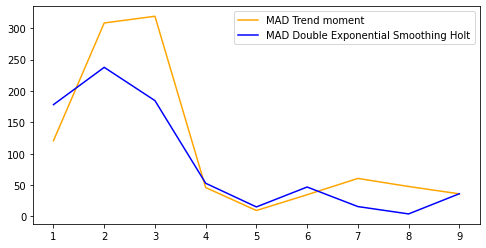

In [ ]:
X = [1,2,3,4,5,6,7,8,9]
y1 = df['MAD tm']
y2 = df['MAD desh']
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='MAD Trend moment')
ax.plot(X, y2, color='blue', label='MAD Double Exponential Smoothing Holt')
plt.legend(loc='best')
plt.show()

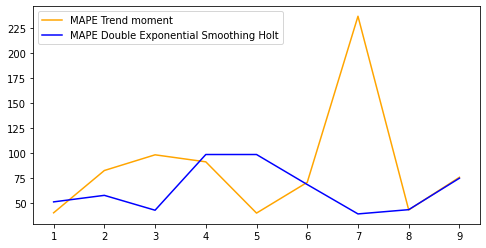

In [ ]:
X = [1,2,3,4,5,6,7,8,9]
y1 = df['MAPE tm']
y2 = df['MAPE desh']
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='MAPE Trend moment')
ax.plot(X, y2, color='blue', label='MAPE Double Exponential Smoothing Holt')
plt.legend(loc='best')
plt.show()